In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
X = np.random.rand(200, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(200)

In [8]:
import pandas as pd
     

df = pd.DataFrame()
     

df['X'] = X.reshape(200)
df['y'] = y
     

df

,X,y
0,-0.125460,0.013219
1,0.450714,0.621043
2,0.231994,0.176117
3,0.098658,-0.006517
4,-0.343981,0.448258
...,...,...
195,-0.150790,-0.002160
196,0.225956,0.117246
197,0.397110,0.462417
198,0.387086,0.465053


Text(0.5, 1.0, 'X vs Y')

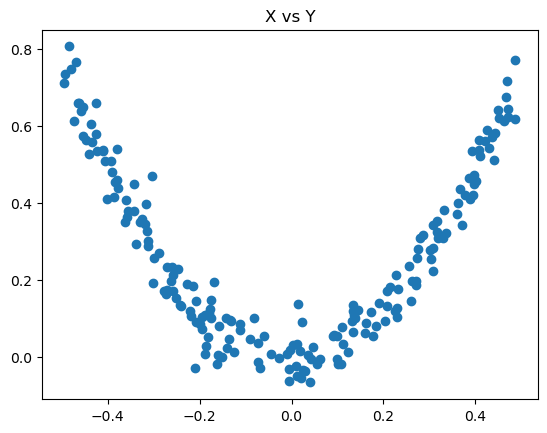

In [10]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')
     

In [11]:
df['pred1'] = df['y'].mean()
     

df

,X,y,pred1
0,-0.125460,0.013219,0.263717
1,0.450714,0.621043,0.263717
2,0.231994,0.176117,0.263717
3,0.098658,-0.006517,0.263717
4,-0.343981,0.448258,0.263717
...,...,...,...
195,-0.150790,-0.002160,0.263717
196,0.225956,0.117246,0.263717
197,0.397110,0.462417,0.263717
198,0.387086,0.465053,0.263717


In [12]:
df['res1'] = df['y'] - df['pred1']
     

df

,X,y,pred1,res1
0,-0.125460,0.013219,0.263717,-0.250497
1,0.450714,0.621043,0.263717,0.357326
2,0.231994,0.176117,0.263717,-0.087599
3,0.098658,-0.006517,0.263717,-0.270234
4,-0.343981,0.448258,0.263717,0.184542
...,...,...,...,...
195,-0.150790,-0.002160,0.263717,-0.265877
196,0.225956,0.117246,0.263717,-0.146471
197,0.397110,0.462417,0.263717,0.198701
198,0.387086,0.465053,0.263717,0.201337


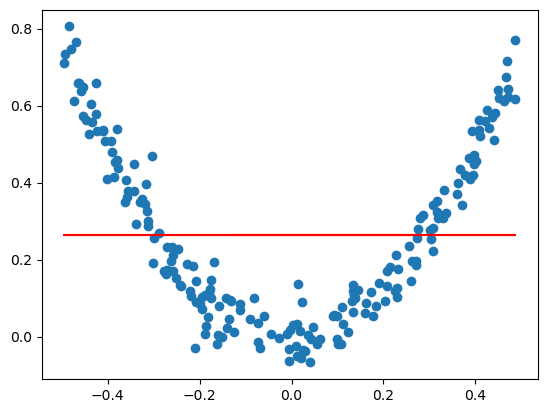

In [13]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [15]:
from sklearn.tree import DecisionTreeRegressor
     

tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
     

tree1.fit(df['X'].values.reshape(200,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

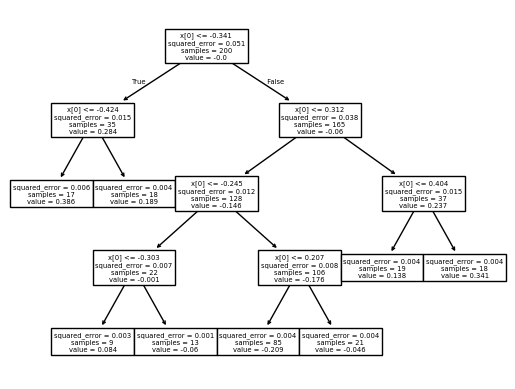

In [16]:

from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

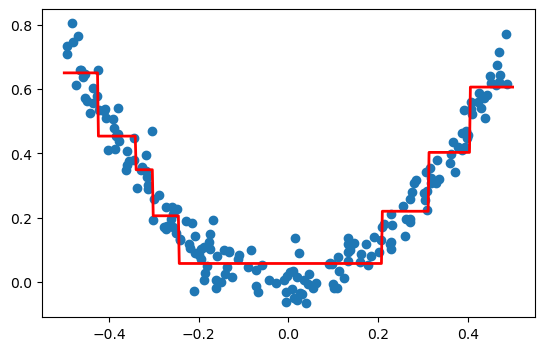

In [17]:
X_test = np.linspace(-0.5, 0.5, 500)
     

y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))
     

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [19]:

df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(200,1))
     

df

,X,y,pred1,res1,pred2
0,-0.125460,0.013219,0.263717,-0.250497,0.056920
1,0.450714,0.621043,0.263717,0.357326,0.606838
2,0.231994,0.176117,0.263717,-0.087599,0.219733
3,0.098658,-0.006517,0.263717,-0.270234,0.056920
4,-0.343981,0.448258,0.263717,0.184542,0.453976
...,...,...,...,...,...
195,-0.150790,-0.002160,0.263717,-0.265877,0.056920
196,0.225956,0.117246,0.263717,-0.146471,0.219733
197,0.397110,0.462417,0.263717,0.198701,0.403216
198,0.387086,0.465053,0.263717,0.201337,0.403216


In [20]:

df['res2'] = df['y'] - df['pred2']
     

df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.013219,0.263717,-0.250497,0.056920,-0.043701
1,0.450714,0.621043,0.263717,0.357326,0.606838,0.014205
2,0.231994,0.176117,0.263717,-0.087599,0.219733,-0.043615
3,0.098658,-0.006517,0.263717,-0.270234,0.056920,-0.063437
4,-0.343981,0.448258,0.263717,0.184542,0.453976,-0.005717
...,...,...,...,...,...,...
195,-0.150790,-0.002160,0.263717,-0.265877,0.056920,-0.059080
196,0.225956,0.117246,0.263717,-0.146471,0.219733,-0.102487
197,0.397110,0.462417,0.263717,0.198701,0.403216,0.059201
198,0.387086,0.465053,0.263717,0.201337,0.403216,0.061837


In [21]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
     

tree2.fit(df['X'].values.reshape(200,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

Text(0.5, 1.0, 'X vs y')

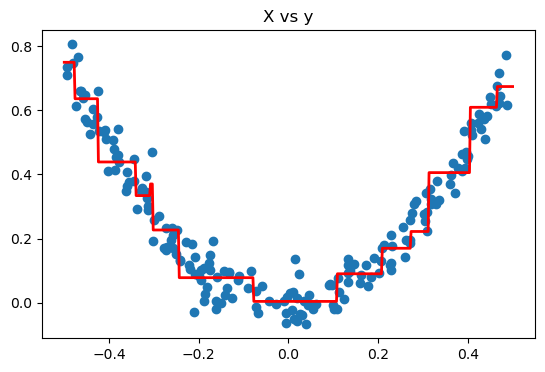

In [22]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])
     

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [23]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

3


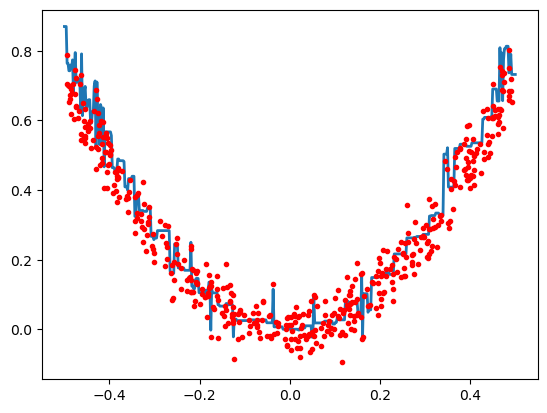

2


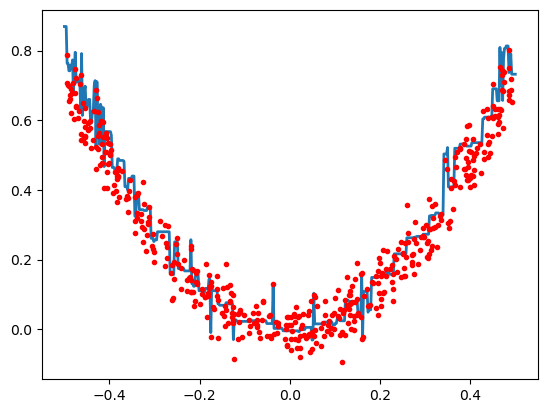

1


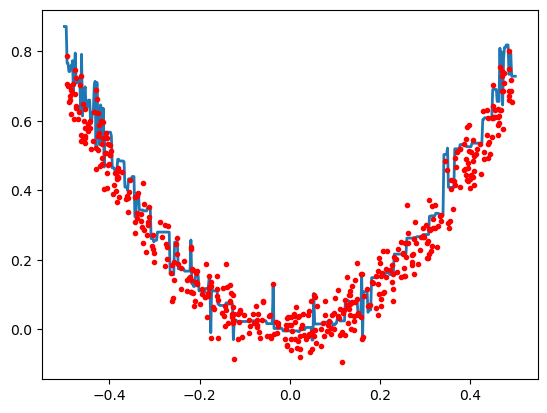

In [35]:

np.random.seed(42)
X = np.random.rand(500, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(500)
gradient_boost(X,y,3,lr=0.1)